# Assignment 7
- by Martim Silva 51304 and Alexandre Sobreira 59451

In [1]:
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import mean_squared_error

-For this assignment 2 models (LSTM and FTLFN) will be used and tested using diferent data generated first using a sinosoidal function (Problem 1) and after using a autoregression (Problem 2). 
    - THe models will also be applyied to data with and without noise.
- Below can be seen the functions created for the problems at hand.
    - first a function for the LSTM model
    - second the function for the FTLFN model
    - Both functions include plots (Loss and Predictions) in order to analyse their learning curve as well as their performance.
    - THe mse's will also be printed in order to compare the 1st fit with the 2nd to analysi the impact of the burn in effect
    - given that this is a single output problem the last Dense layer has size 1

In [2]:
def lstm_func(nrEpochs, X, y):
    tf.random.set_seed(42)
    ## LSTM Model
    lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer((12,1)),    # The input layer will be lag
    tf.keras.layers.LSTM(10),  # Since we have an imput of 12 it doesnt make sence to use higher than that # trocar par DENSE
    tf.keras.layers.Dense(1, activation="tanh"), # Since I want to predict 1 value I want to output 1!
    ])
    ## Compile
    lstm_model.compile(optimizer = "Adam", loss = "mse")
    ##Adapt X
    X_lstm = np.expand_dims(X, axis = 2)
    ## 1st split
    X_lstm_train1 = X_lstm[:2400]
    y_lstm_train1 = y[:2400]
    # normalization
    train1_mean = X_lstm_train1.mean()
    train1_std = X_lstm_train1.std()
    X_lstm_train1 = (X_lstm_train1 - train1_mean) / train1_std
    ### fit 
    history_lstm1 = lstm_model.fit(X_lstm_train1, y_lstm_train1, batch_size=1, epochs=nrEpochs, shuffle=False, verbose=False)
    ### pred
    X_lstm_test1 = X_lstm[2401:2501]
    y_lstm_test1 = y[2401:2501]
    # normalization
    X_lstm_test1 = (X_lstm_test1 - train1_mean) / train1_std
    y_pred1 = lstm_model.predict(X_lstm_test1)
    mse1 = mean_squared_error(y_lstm_test1, y_pred1)
    print("The mse for the 1st split is: " + str(mse1))
    ####### 2nd split and fit #######
    X_lstm_train2=X_lstm[2401:4900]
    y_lstm_train2=y[2401:4900]
    #normalization
    train2_mean = X_lstm_train2.mean()
    train2_std = X_lstm_train2.std()
    X_lstm_train2 = (X_lstm_train2 - train2_mean) / train2_std
    ### fit 
    history_lstm2 = lstm_model.fit(X_lstm_train2, y_lstm_train2, batch_size=1, epochs=nrEpochs, shuffle=False, verbose=False)
    ###pred
    X_lstm_test2 = X_lstm[4901:]
    y_lstm_test2 = y[4901:]
    # normalization
    X_lstm_test2 = (X_lstm_test2 - train2_mean) / train2_std
    y_pred2 = lstm_model.predict(X_lstm_test2)
    mse2 = mean_squared_error(y_lstm_test2, y_pred2)
    print("The mse for the 2nd split is: " + str(mse2))


    ## PLots for learning curves (loss)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    
    ax1.plot(history_lstm1.history['loss'], label="loss")
    ax1.set_title("Loss Plot 1st split")
   
    ax2.plot(history_lstm2.history['loss'], label="loss")
    ax2.set_title("Loss Plot 2nd split")
    
    plt.show()

    ## Plots for predictions and expected results 2
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(35,15))

    ax1.set_title("Train, Test and Predicted Results for 1st split")
    ax1.plot(y_lstm_train1,  label="Train")
    ax1.plot([None for i in y_lstm_train1] + [x for x in y_lstm_test1], label="Test", lw = 2)
    ax1.plot([None for i in y_lstm_train1] + [x for x in y_pred1], label="Predicted", linestyle = ":", lw = 3)
    ax1.legend(loc="upper left", prop= {"size": 15}) 
    ax1.tick_params(labelsize=15)

    ax2.set_title("Train, Test and Predicted Results for 2nd split")
    ax2.plot(y_lstm_train2,  label="Train")
    ax2.plot([None for i in y_lstm_train2] + [x for x in y_lstm_test2], label="Test", lw = 2)
    ax2.plot([None for i in y_lstm_train2] + [x for x in y_pred2], label="Predicted", linestyle = ":", lw = 3)
    ax2.legend(loc="upper left", prop= {"size": 15}) 
    ax2.tick_params(labelsize=15)

    plt.show()

In [3]:
def ftlfn_func(nrEpochs, X, y): 
    ## FTLFN Model
    tf.random.set_seed(42)
    ftlf_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_dim=12),    
    tf.keras.layers.Dense(1),  
    ])
    ## Compile
    ftlf_model.compile(optimizer = "Adam", loss = "mse")
    ##Adapt X
    X = np.expand_dims(X, axis = 2)
    y = np.array(y)
    ## 1st split
    X_ftlfn_train1 = X[:2400]
    y_ftlfn_train1 = y[:2400]
    # normalization
    train1_mean = X_ftlfn_train1.mean()
    train1_std = X_ftlfn_train1.std()
    X_ftlfn_train1 = (X_ftlfn_train1 - train1_mean) / train1_std
    ### fit 
    history_ftlfn1 = ftlf_model.fit(X_ftlfn_train1, y_ftlfn_train1, batch_size=1, epochs=nrEpochs, shuffle=False, verbose=False)
    ### pred
    X_ftlfn_test1 = X[2401:2501]
    y_ftlfn_test1 = y[2401:2501]
    # normalization
    X_ftlfn_test1 = (X_ftlfn_test1 - train1_mean) / train1_std
    y_pred1 = ftlf_model.predict(X_ftlfn_test1)
    mse1 = mean_squared_error(y_ftlfn_test1, y_pred1)
    print("The mse for the 1st split is: " + str(mse1))

    ####### 2nd split and fit #######
    X_ftlfn_train2=X[2401:4900]
    y_ftlfn_train2=y[2401:4900]
    #normalization
    train2_mean = X_ftlfn_train2.mean()
    train2_std = X_ftlfn_train2.std()
    X_ftlfn_train2 = (X_ftlfn_train2 - train2_mean) / train2_std
    ### fit 
    history_ftlfn2 = ftlf_model.fit(X_ftlfn_train2, y_ftlfn_train2, batch_size=1, epochs=nrEpochs, shuffle=False, verbose=False)
    ###pred
    X_ftlfn_test2 = X[4901:]
    y_ftlfn_test2 = y[4901:]
    # normalization
    X_ftlfn_test2 = (X_ftlfn_test2 - train2_mean) / train2_std
    y_pred2 = ftlf_model.predict(X_ftlfn_test2)
    mse2 = mean_squared_error(y_ftlfn_test2, y_pred2)
    print("The mse for the 2nd split is: " + str(mse2))
    
    ## PLots for learning curves (loss)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    
    ax1.plot(history_ftlfn1.history['loss'], label="loss")
    ax1.set_title("Loss Plot 1st split")
   
    ax2.plot(history_ftlfn2.history['loss'], label="loss")
    ax2.set_title("Loss Plot 2nd split")
    
    plt.show()

    ## Plots for predictions and expected results 2
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(35,15))

    ax1.set_title("Train, Test and Predicted Results for 1st split")
    ax1.plot(y_ftlfn_train1,  label="Train")
    ax1.plot([None for i in y_ftlfn_train1] + [x for x in y_ftlfn_test1], label="Test", lw = 2)
    ax1.plot([None for i in y_ftlfn_train1] + [x for x in y_pred1], label="Predicted", linestyle = ":", lw = 3)
    ax1.legend(loc="upper left", prop= {"size": 15}) 
    ax1.tick_params(labelsize=15)

    ax2.set_title("Train, Test and Predicted Results for 2nd split")
    ax2.plot(y_ftlfn_train2,  label="Train")
    ax2.plot([None for i in y_ftlfn_train2] + [x for x in y_ftlfn_test2], label="Test", lw = 2)
    ax2.plot([None for i in y_ftlfn_train2] + [x for x in y_pred2], label="Predicted", linestyle = ":", lw = 3)
    ax2.legend(loc="upper left", prop= {"size": 15}) 
    ax2.tick_params(labelsize=15)

    plt.show()

- Regarding the above functions:
    - For this type of problem, since we are comparing values, the MSE is the best lostsfunction, for images would be the cross entropy for example.
    - The fit shuffles by default and we dont want that, we want to preserva the order, therefore shuffle = False 

# Problem 1
- Use as a time series a sinusoidal function with 100 periods and 50 points per period

- The data will be obtain using The sin function:
-  We consturct a data set  which has 12 datapoints and the label.
    - A "shift" will be made every 12 points.
        - We need to use a filter of 12 (we are going to observe the 12 and predict the next 1). Then we shift again and so one.
    -This 12 points can be considered the lag.

In [4]:
lag = 12
points_per_period = 50
periods = 100
data = np.sin(np.linspace(0,2*np.pi*periods, num=periods*points_per_period))                                                                    

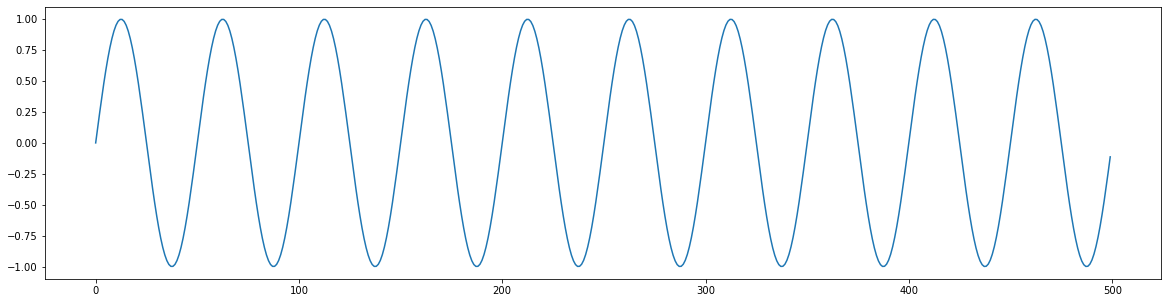

In [5]:
fig = plt.figure(figsize=(20,5))
plt.plot(data[0:500])
plt.show()

- above we can see the first 500 points generated using the sinosoidal function

- The sin function gave the complete signal. But we need to adapt for this problem (time series problem)
    - To make predictions we need to to have several windows.
    - We will construct a data set which has 12 datapoints and the label.

In [6]:
## Adapt Data for Time series 
X, y = [], []
for i in range(lag, data.shape[0]-1):
    X.append(data[i-lag:i]) # we getting 12 sample. My x will have 4000 samples each with 12 instances
    y.append(data[i])

X = np.array(X)
y = np.array(y)

## Normalize the data
- It is important to scale features before training a neural network. Normalization is a common way of doing this scaling: subtract the mean and divide by the standard deviation of each feature.
- The normalization was included on the functions!

## Burn In Effect
- The Network needs to "warm up" to find the direction of the gradient. 
- It is expected to observe impact on the MSE on the second fit.

In [7]:
# 10 epochs will be used for the 1st problem and 
epochs = 10

## i) no noise

### LSTM

4/4 [==============================] - 1s 2ms/step
The mse for the 1st split is: 0.00019265632826914175
3/3 [==============================] - 0s 3ms/step
The mse for the 2nd split is: 0.0003484749333508414


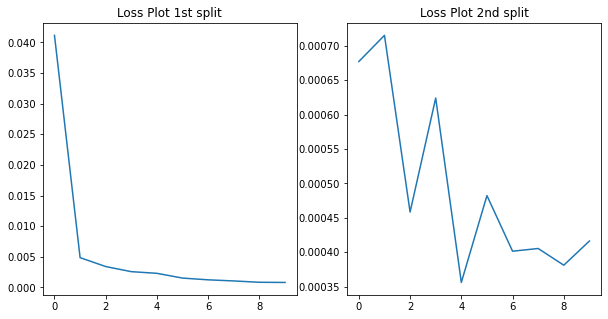

c:\Users\afbso\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
c:\Users\afbso\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


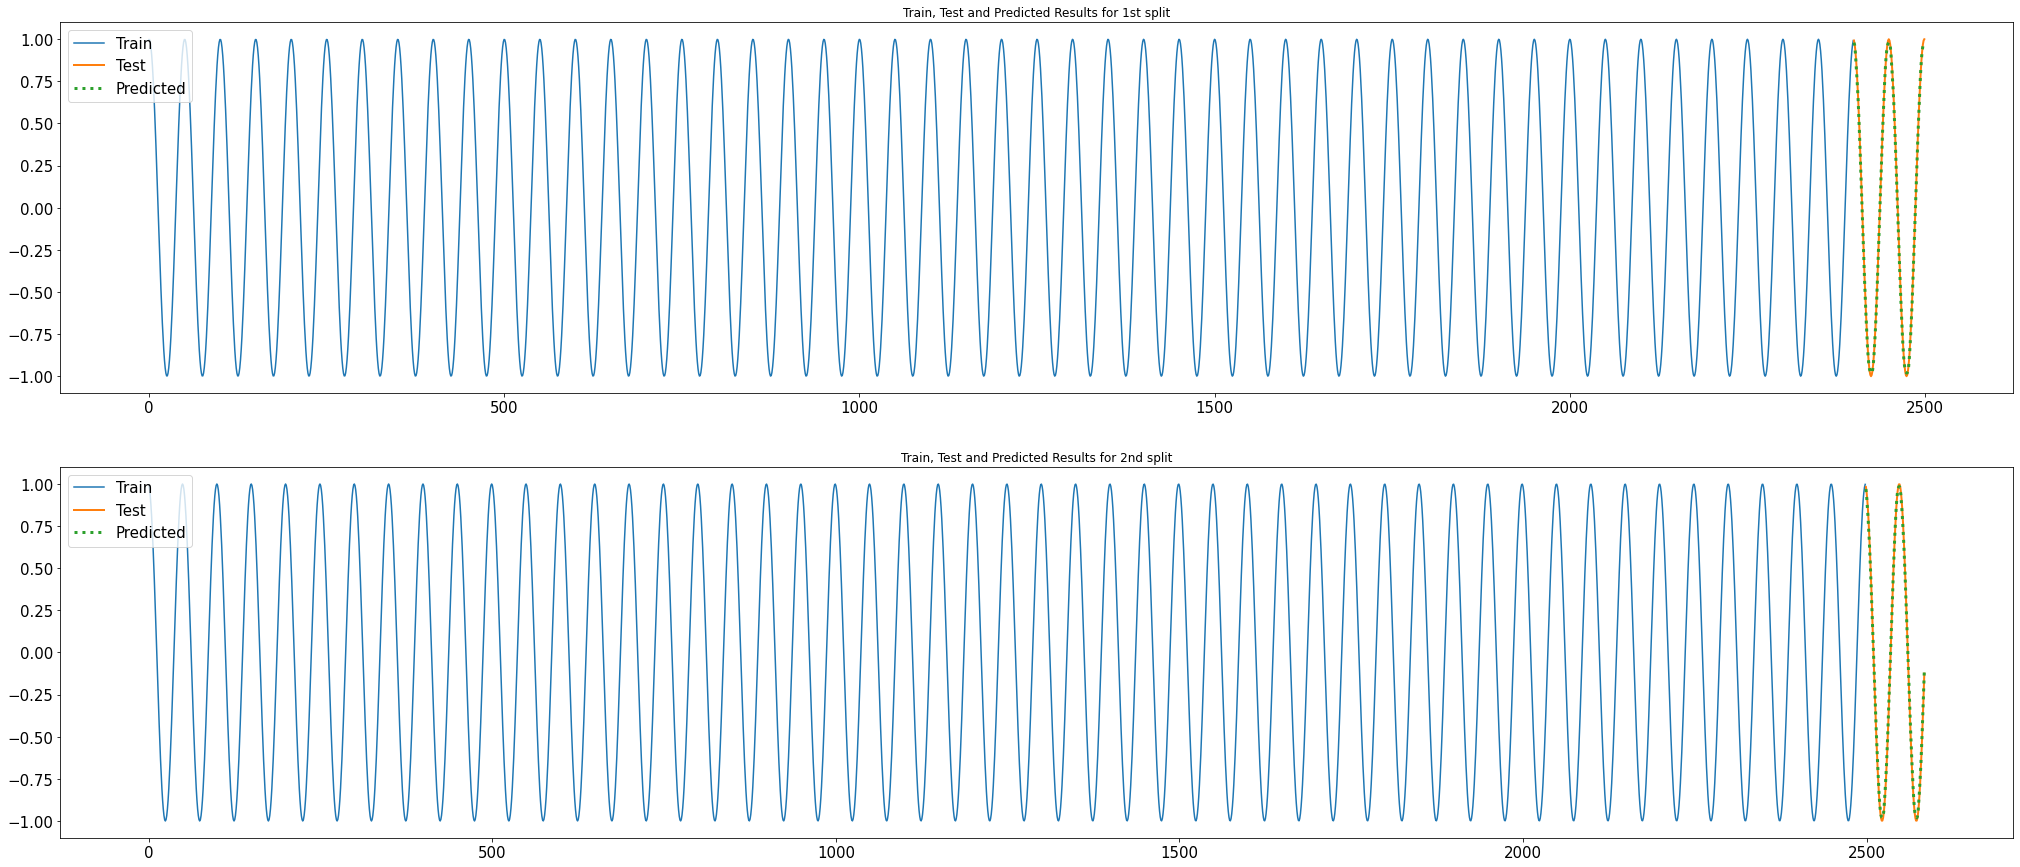

In [8]:
lstm_func(epochs, X, y)

- We can see that the mse of the second split is in fact smaller than mse of the first split, which may probably be related to the burn in efect.
    - Im terms of learning process the second split shows a more stable curve.
- Overall the second split seems to produce better predictions.

### FTLFN

4/4 [==============================] - 0s 2ms/step
The mse for the 1st split is: 7.612550051268476e-05
3/3 [==============================] - 0s 2ms/step
The mse for the 2nd split is: 0.002164484920715847


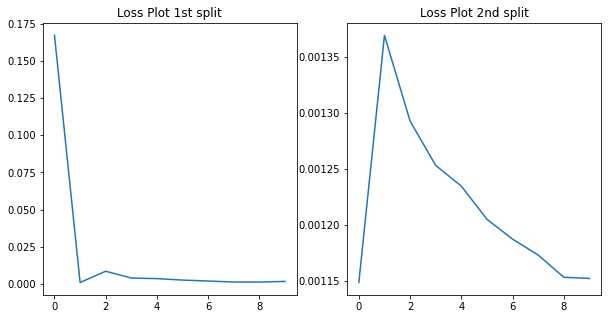

c:\Users\afbso\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
c:\Users\afbso\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


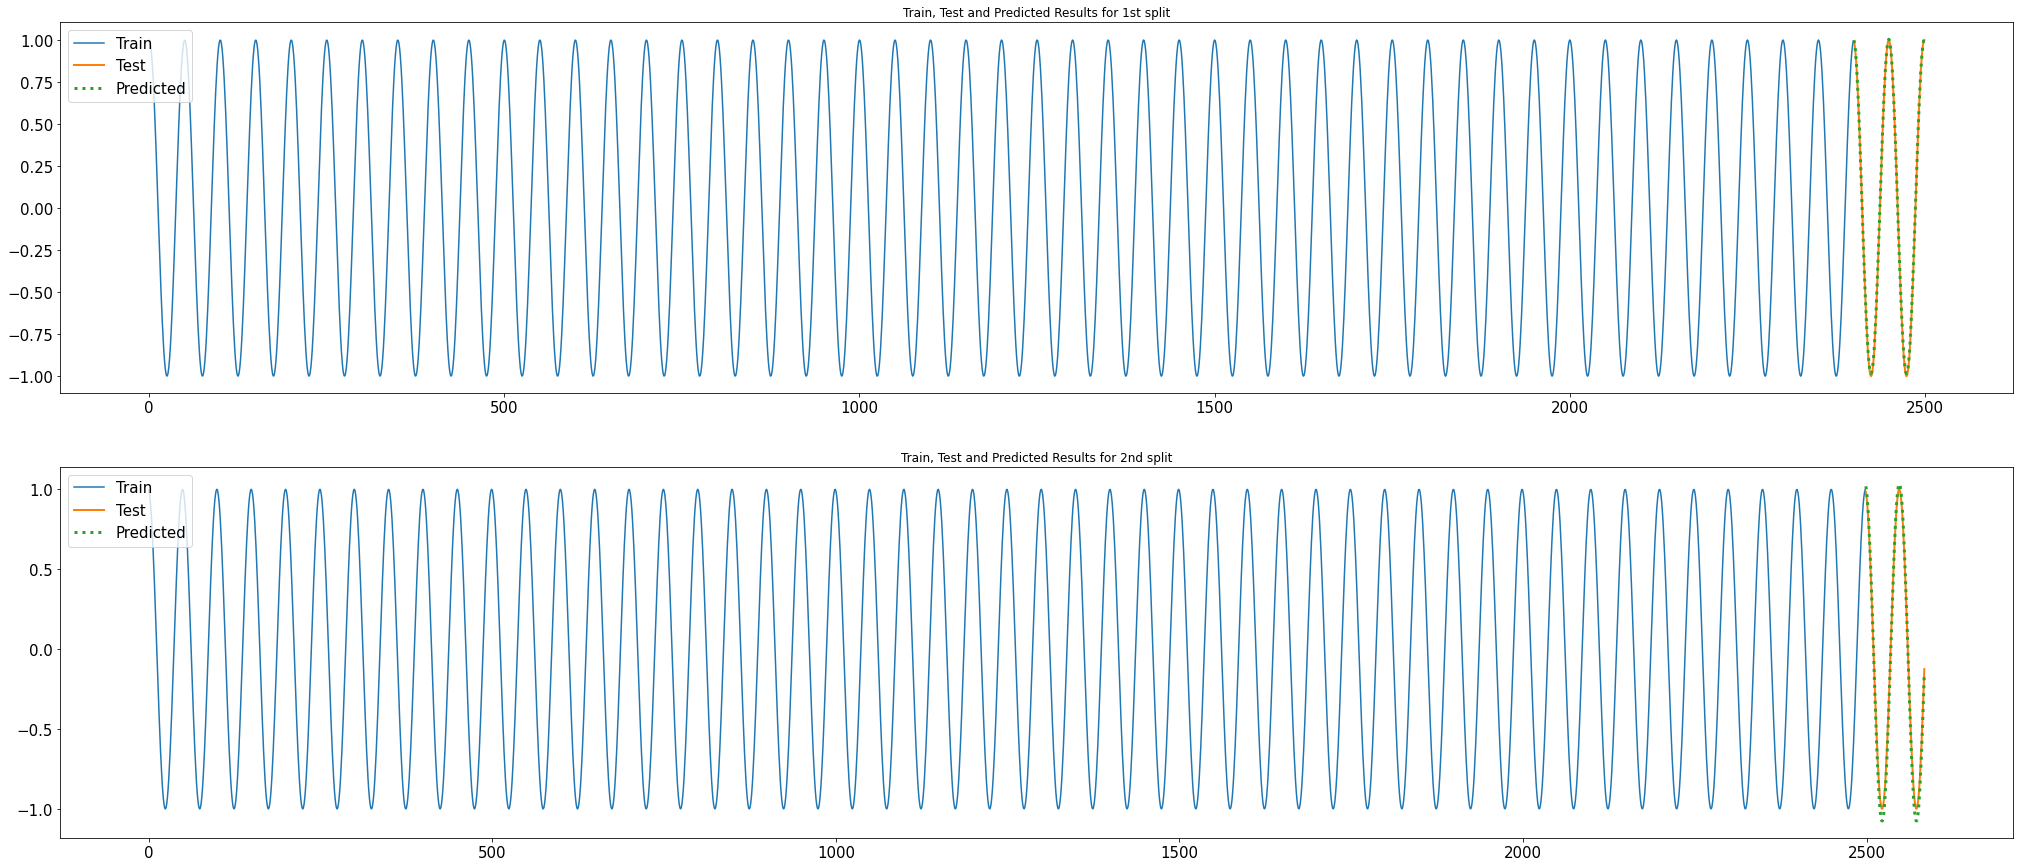

In [9]:
ftlfn_func(epochs, X, y)

- For the FTLFN the behavior seems to be diferent. First the mse of the second split is in fact higher than the one from the first split and the lerning curve seems to be not as stable as the one from the LSTM.
- Even if the final mse value is higher is possible to see that the second split starts with lower mse value on the first epochs when compared to the first split. 

## ii) with noise by adding a Gaussian N(0, 0.05).

- In this second point of problem 1 noise will be added to the data using a Gaussian with distribution (0, 0.05)
- the following function will be used: (np.random(loc=0,scale (0.05, size = data[shape[0]]))

In [10]:
periods = 100
lag = 12
points_per_period = 50

In [11]:
data = np.sin(np.linspace(0,2*np.pi*periods, num=periods*points_per_period)) 
#add noise                                                                                                                                                                                   
data += np.random.normal(loc=0, scale=0.05, size=data.shape[0])

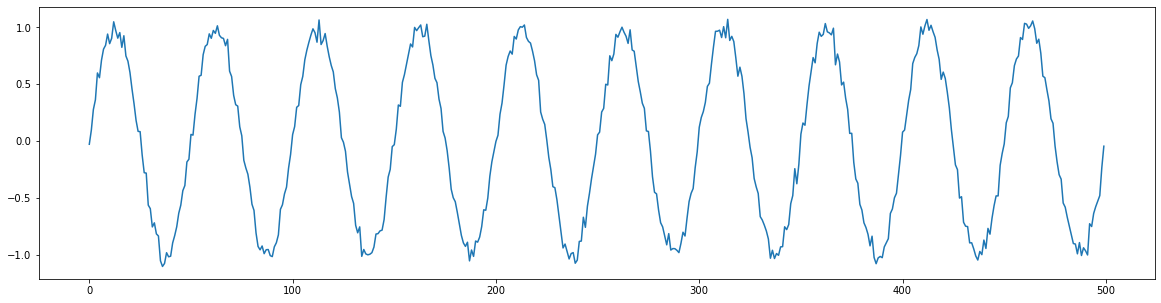

In [12]:
fig = plt.figure(figsize=(20,5))
plt.plot(data[0:500])
plt.show()

- it is possible to see the de data got much more irregular when a noise of 0.05 was added.
- As in the previous data creation, this one need to be adapted to a time series problem as well.
    - lag of 12 to

In [13]:
X, y = [], []
for i in range(lag, data.shape[0]-1):
    X.append(data[i-lag:i]) # we getting 12 sample. My x will have 4000 samples each with 12 instances
    y.append(data[i])

X = np.array(X)
y = np.array(y)

### LSTM

4/4 [==============================] - 0s 3ms/step
The mse for the 1st split is: 0.0027302983653396356
3/3 [==============================] - 0s 3ms/step
The mse for the 2nd split is: 0.0031834889966590317


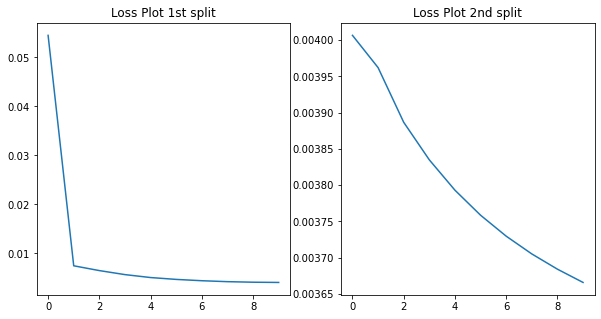

c:\Users\afbso\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
c:\Users\afbso\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


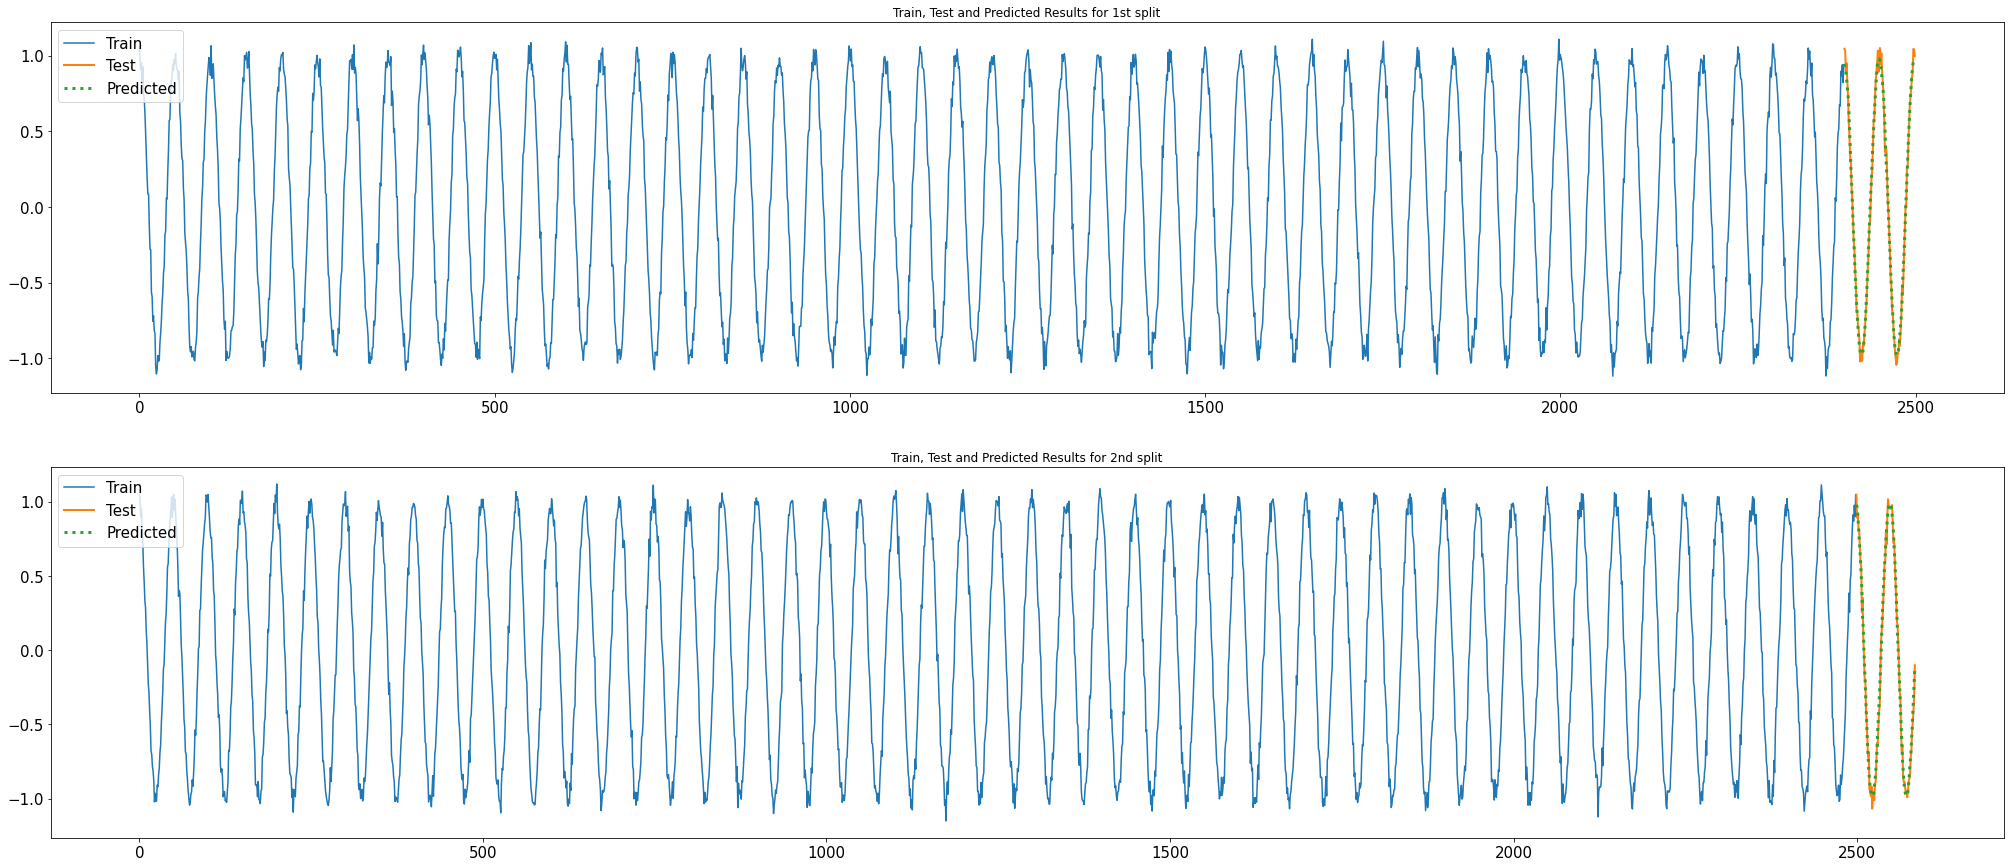

In [14]:
lstm_func(epochs, X, y)

- Again, the second split shows a samller mse when compared to the first split as well as a more stable learning curve.
- When looking at the pred plots it is possible to obser a strange behavior from the preds which seem like they do not correspond to the real values, still the mse's obtained are considered small values which does not correspond to what is observed in the plots. THis may be due to the adition of the noise which creates this visual efect.

### FTLFN

4/4 [==============================] - 0s 2ms/step
The mse for the 1st split is: 0.003524809209247734
3/3 [==============================] - 0s 2ms/step
The mse for the 2nd split is: 0.003443554183005791


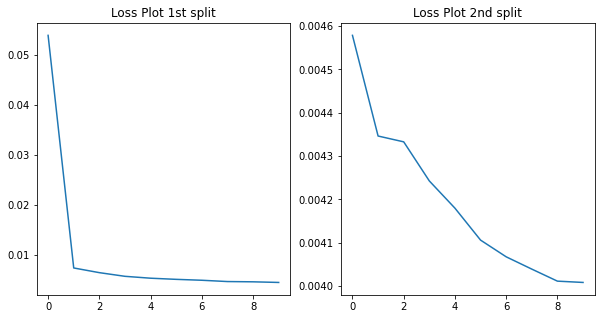

c:\Users\afbso\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
c:\Users\afbso\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


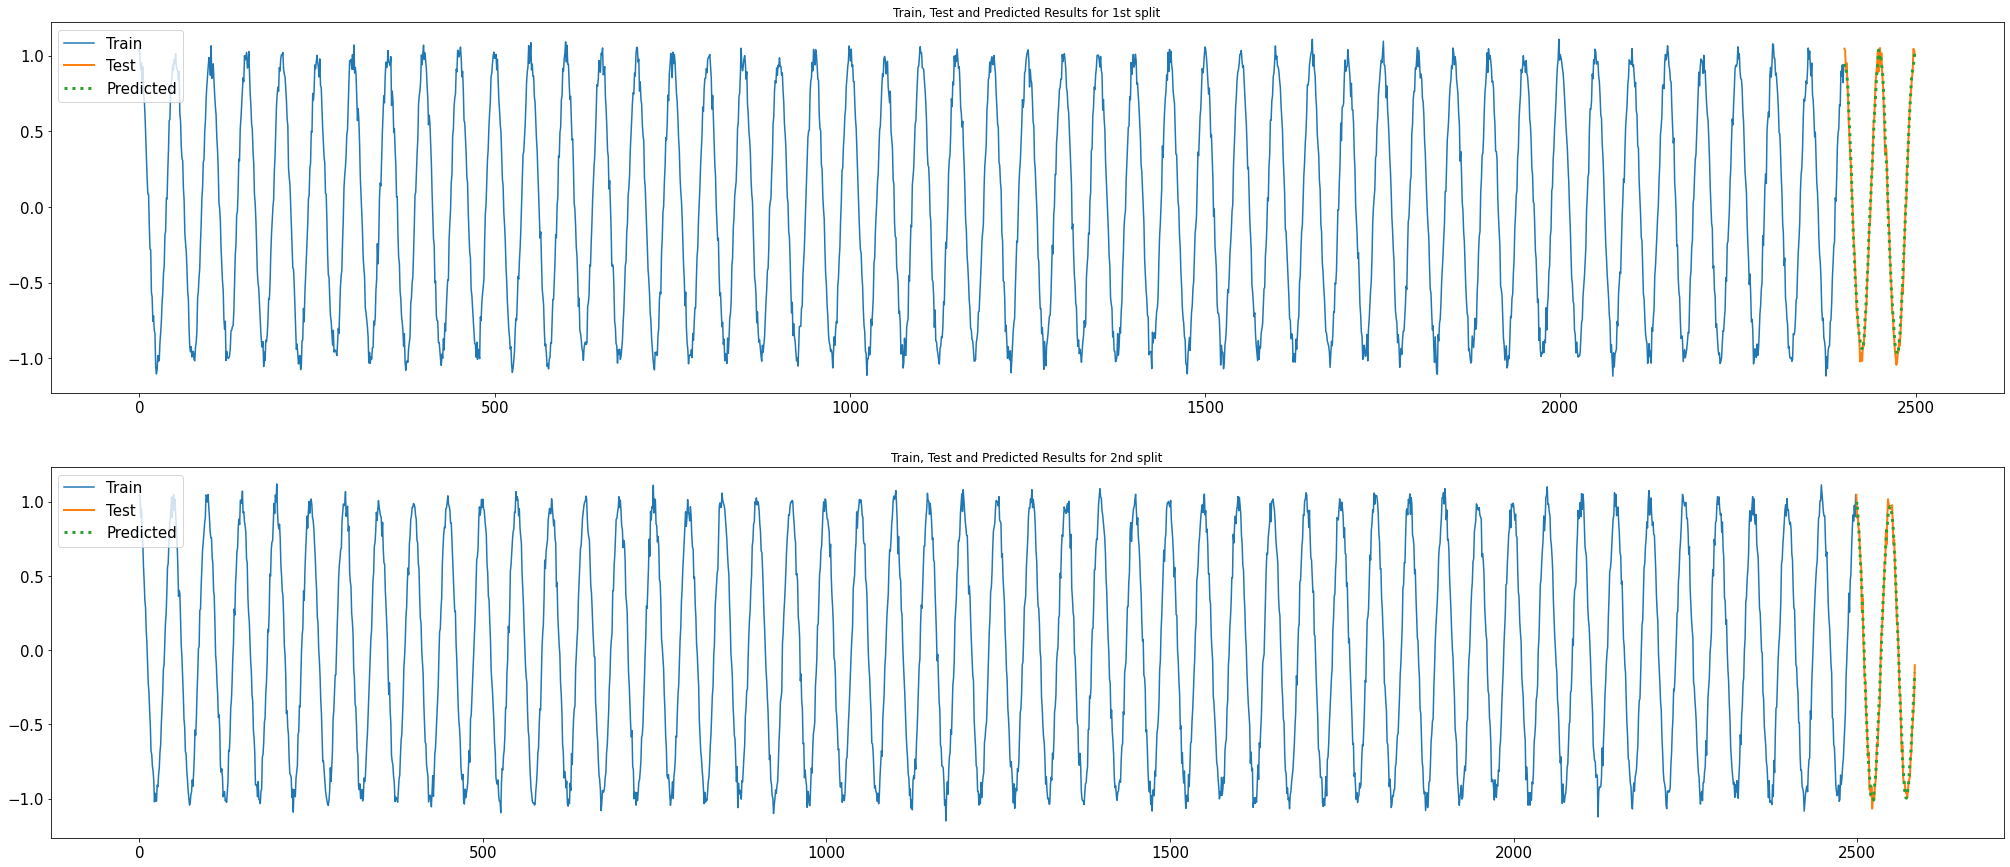

In [15]:
ftlfn_func(epochs, X, y)

- With noise added the FTLFN show a slightly diferent behavior than with out noise. 
- First the mse value of the second split is lower than the first one, as well as the starting values in the first epochs.
- the learning curve of the second split seems to be more stable as well.
- WHen observing the predictions plots, as in the LSTM, a strange behavior is present but still less then with the LSTM. Here the pred seem to distribute better on the true values

# Problem 2

In [16]:
nrEpochs = 50

alpha_one = 0.6
alpha_two = -0.54
alpha_three = -0.44
data = [5,6,3]
nr_datapoints = 5000
X, y = [], []

for i in range(nr_datapoints-3):
    data.append(alpha_one*data[i+2]
    + alpha_two*data[i+1]
    + alpha_three*data[i])

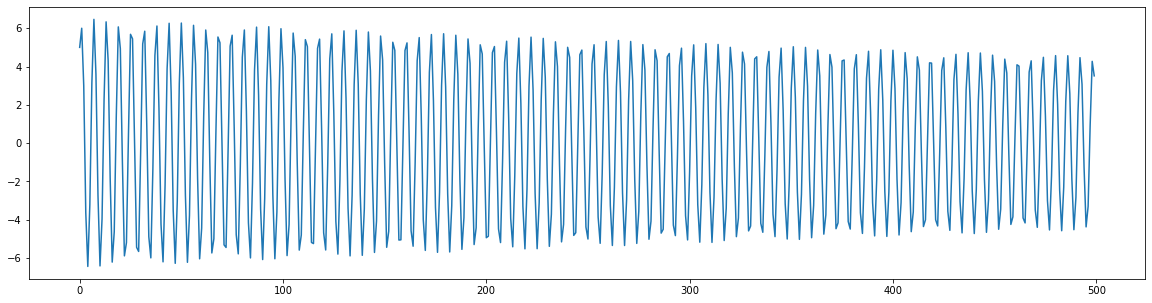

In [17]:
fig = plt.figure(figsize=(20,5))
plt.plot(data[0:500])
plt.show()

Using instead of a sinusoidal function the provided autoregression model we still work with data that is bounded in a fixed interval, now fixed between around 6 and -6 values roughly. Unlike the data for problem 1 however from the initial 500 points observed here tend to converge in their slow pace to zero with "inner oscilations" with around fourteen points composing each one of these. The lag factor was kept at value twelve so the comparisons from results in problem 1 and 2 won't have as many components that make their results harder to differentiate.
To adhere the fact that this data is more complex to draw predictions from then a sinusoidal with 50 points per period with 100 periods total, the number of Epochs used for training all models mentioned below was 50 instead of 10.

In [18]:
for i in range(lag, len(data)-1):
    X.append(data[i-lag:i]) # we getting 12 sample. My x will have 4000 samples each with 12 instances
    y.append(data[i])

y = np.array(y)
X = np.array(X)

## i) no noise, clean

### LSTM

In [ ]:
lstm_func(nrEpochs, X, y)

- The mse value on the LSTM model trained with the second split of this new data set is much smaller than the value on the first split, this fact would be supported by the existence of the burn in effect that occurs in models that consider different time steps such as this one.
  - Regarding the learning process there is little difference in the curves save for the epochs 4-5 to 10 where there is a slight deviation from the expected loss values as they are in the model when using just the first split of data.
- The degree of the quality of predictions of both results is very high and very similar for both splits

### FTLFN

4/4 [==============================] - 0s 667us/step
The mse for the 1st split is: 1.0429917009311085e-07
3/3 [==============================] - 0s 1ms/step
The mse for the 2nd split is: 2.492350758335523e-09


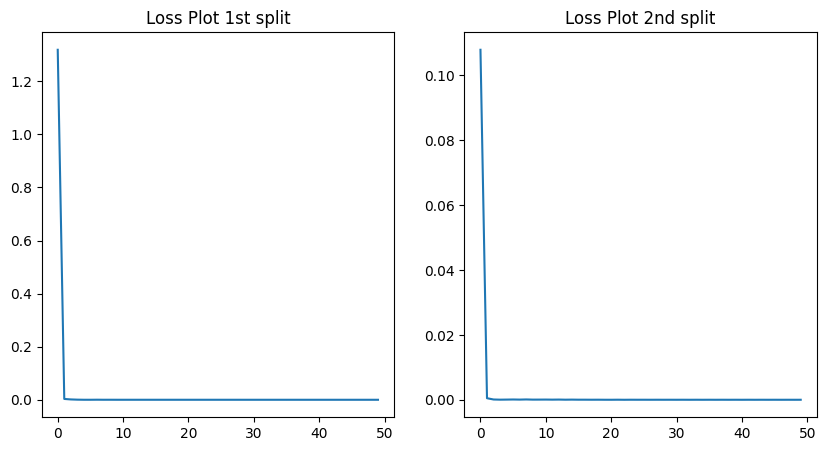

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


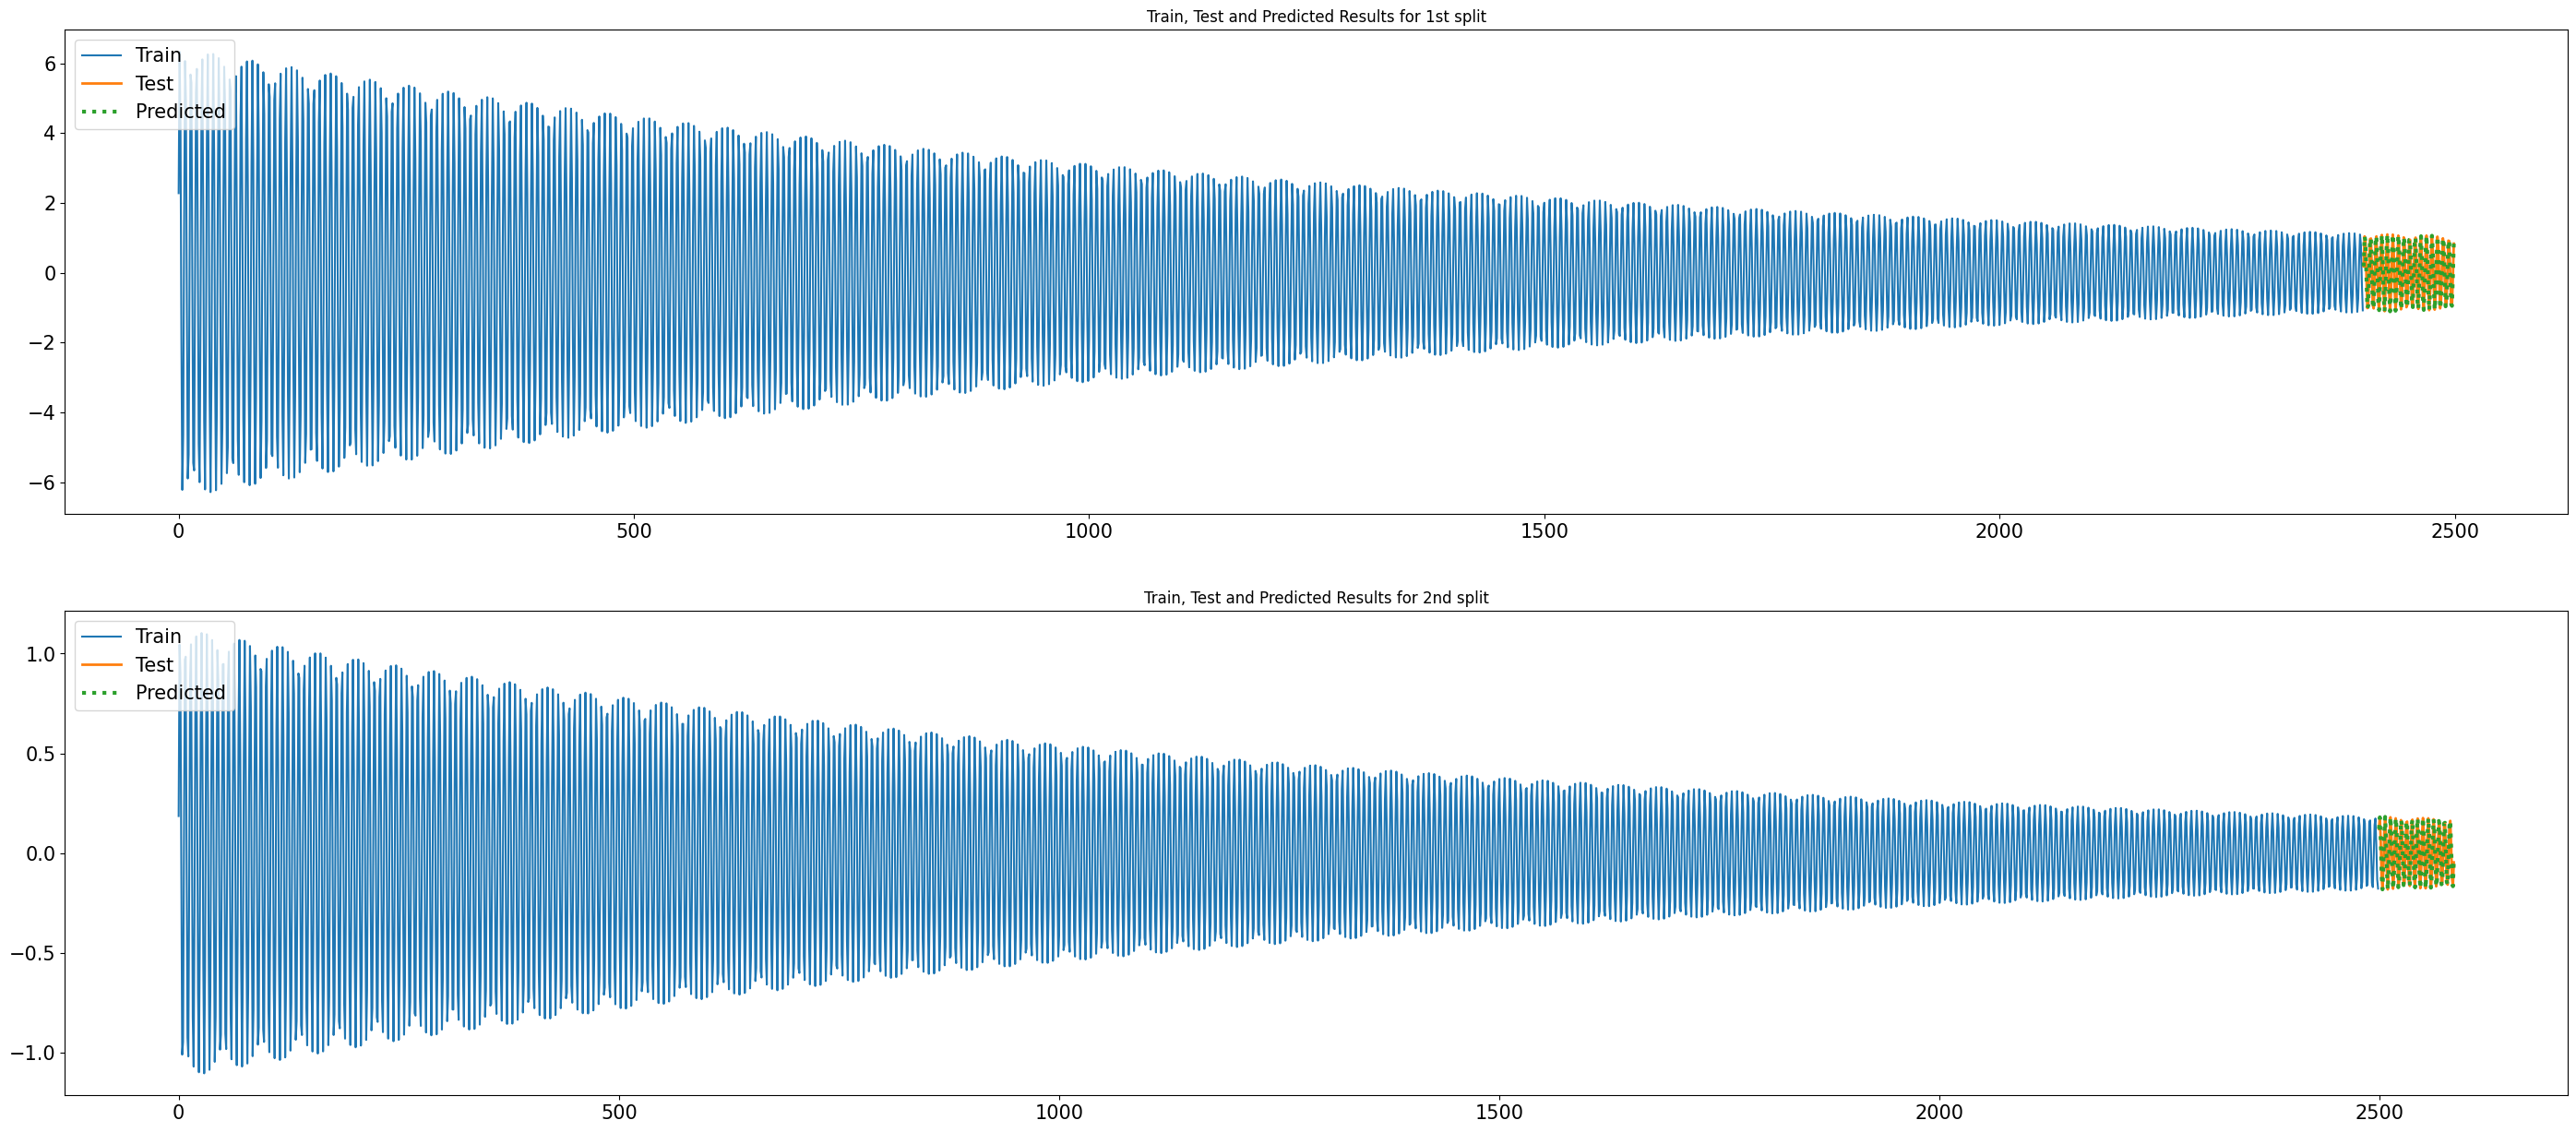

In [ ]:
ftlfn_func(nrEpochs, X, y)

- On the FTLFN model the results are even more similar with no distinction visible from observing the mse loss graph whatsoever.
- The prediction results are comparable to how they appeared in the LSTM model with the values patching predictions as the shape they take comes closer and closer to values of zero.

## ii) with noise by adding a Gaussian noise N(0, 0.01)

In [ ]:
# lets add the lag
alpha_one = 0.6
alpha_two = -0.54
alpha_three = -0.44
data = [5,6,3]
nr_datapoints = 5000

X, y = [], []

for i in range(nr_datapoints-3):
    data.append(alpha_one*data[i+2]
    + alpha_two*data[i+1]
    + alpha_three*data[i])

In [ ]:
data += np.random.normal(loc=0, scale=0.01, size=data.shape[0])

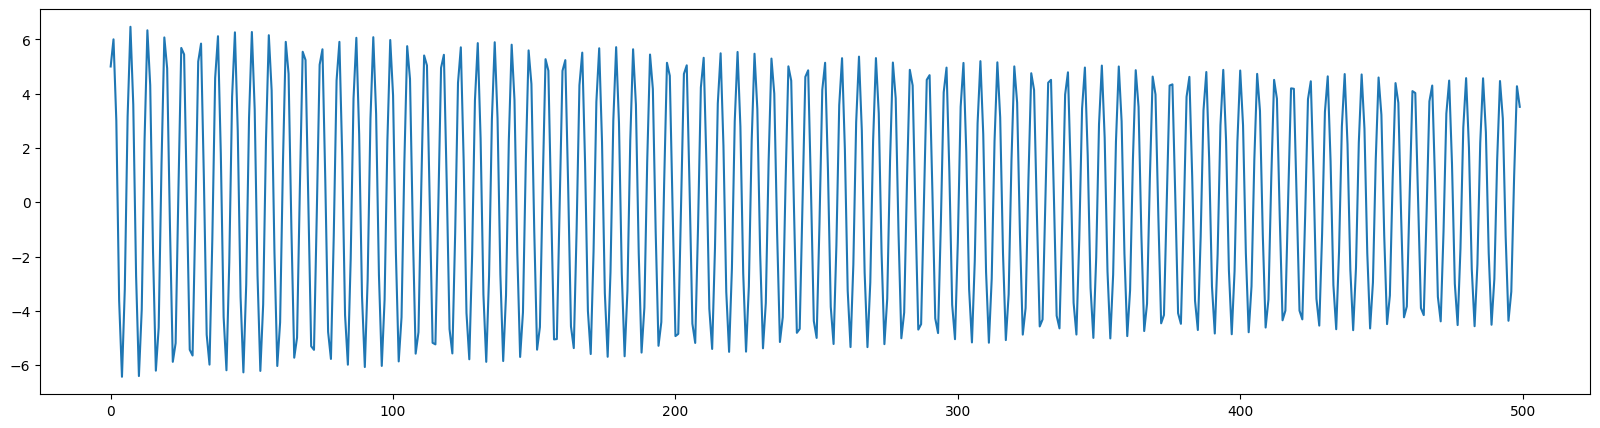

In [ ]:
fig = plt.figure(figsize=(20,5))
plt.plot(data[0:500])
plt.show()

Here the data used varies slightly where there is an introduction of noise in the creation of the data that carries over to generate all the results from the very start of the conception of the data set. However, graphically no change is observed when compared to the initial data set of this problem 2. We can perhaps attribute this to how low the selected value is when used additively in the autoregression model provided.

In [ ]:
for i in range(lag, len(data)-1):
    X.append(data[i-lag:i]) # we getting 12 sample. My x will have 4000 samples each with 12 instances
    y.append(data[i])

y = np.array(y)

### LSTM

4/4 [==============================] - 0s 1ms/step
The mse for the 1st split is: 0.0020691430972759137
3/3 [==============================] - 0s 2ms/step
The mse for the 2nd split is: 1.844482959367263e-07


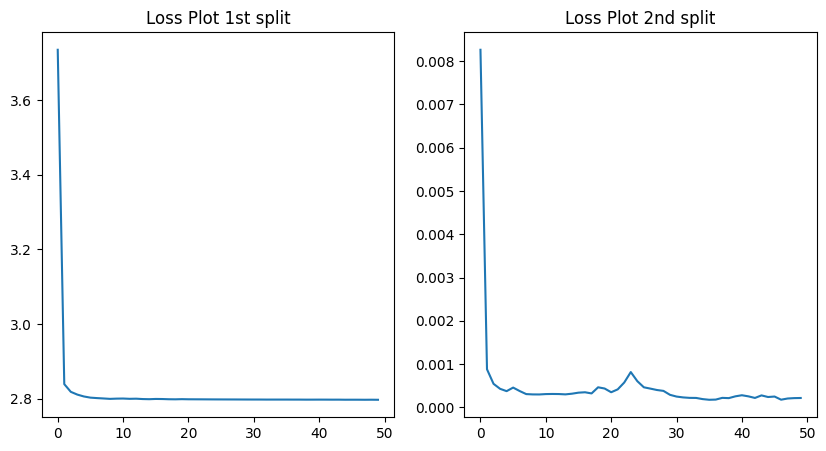

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


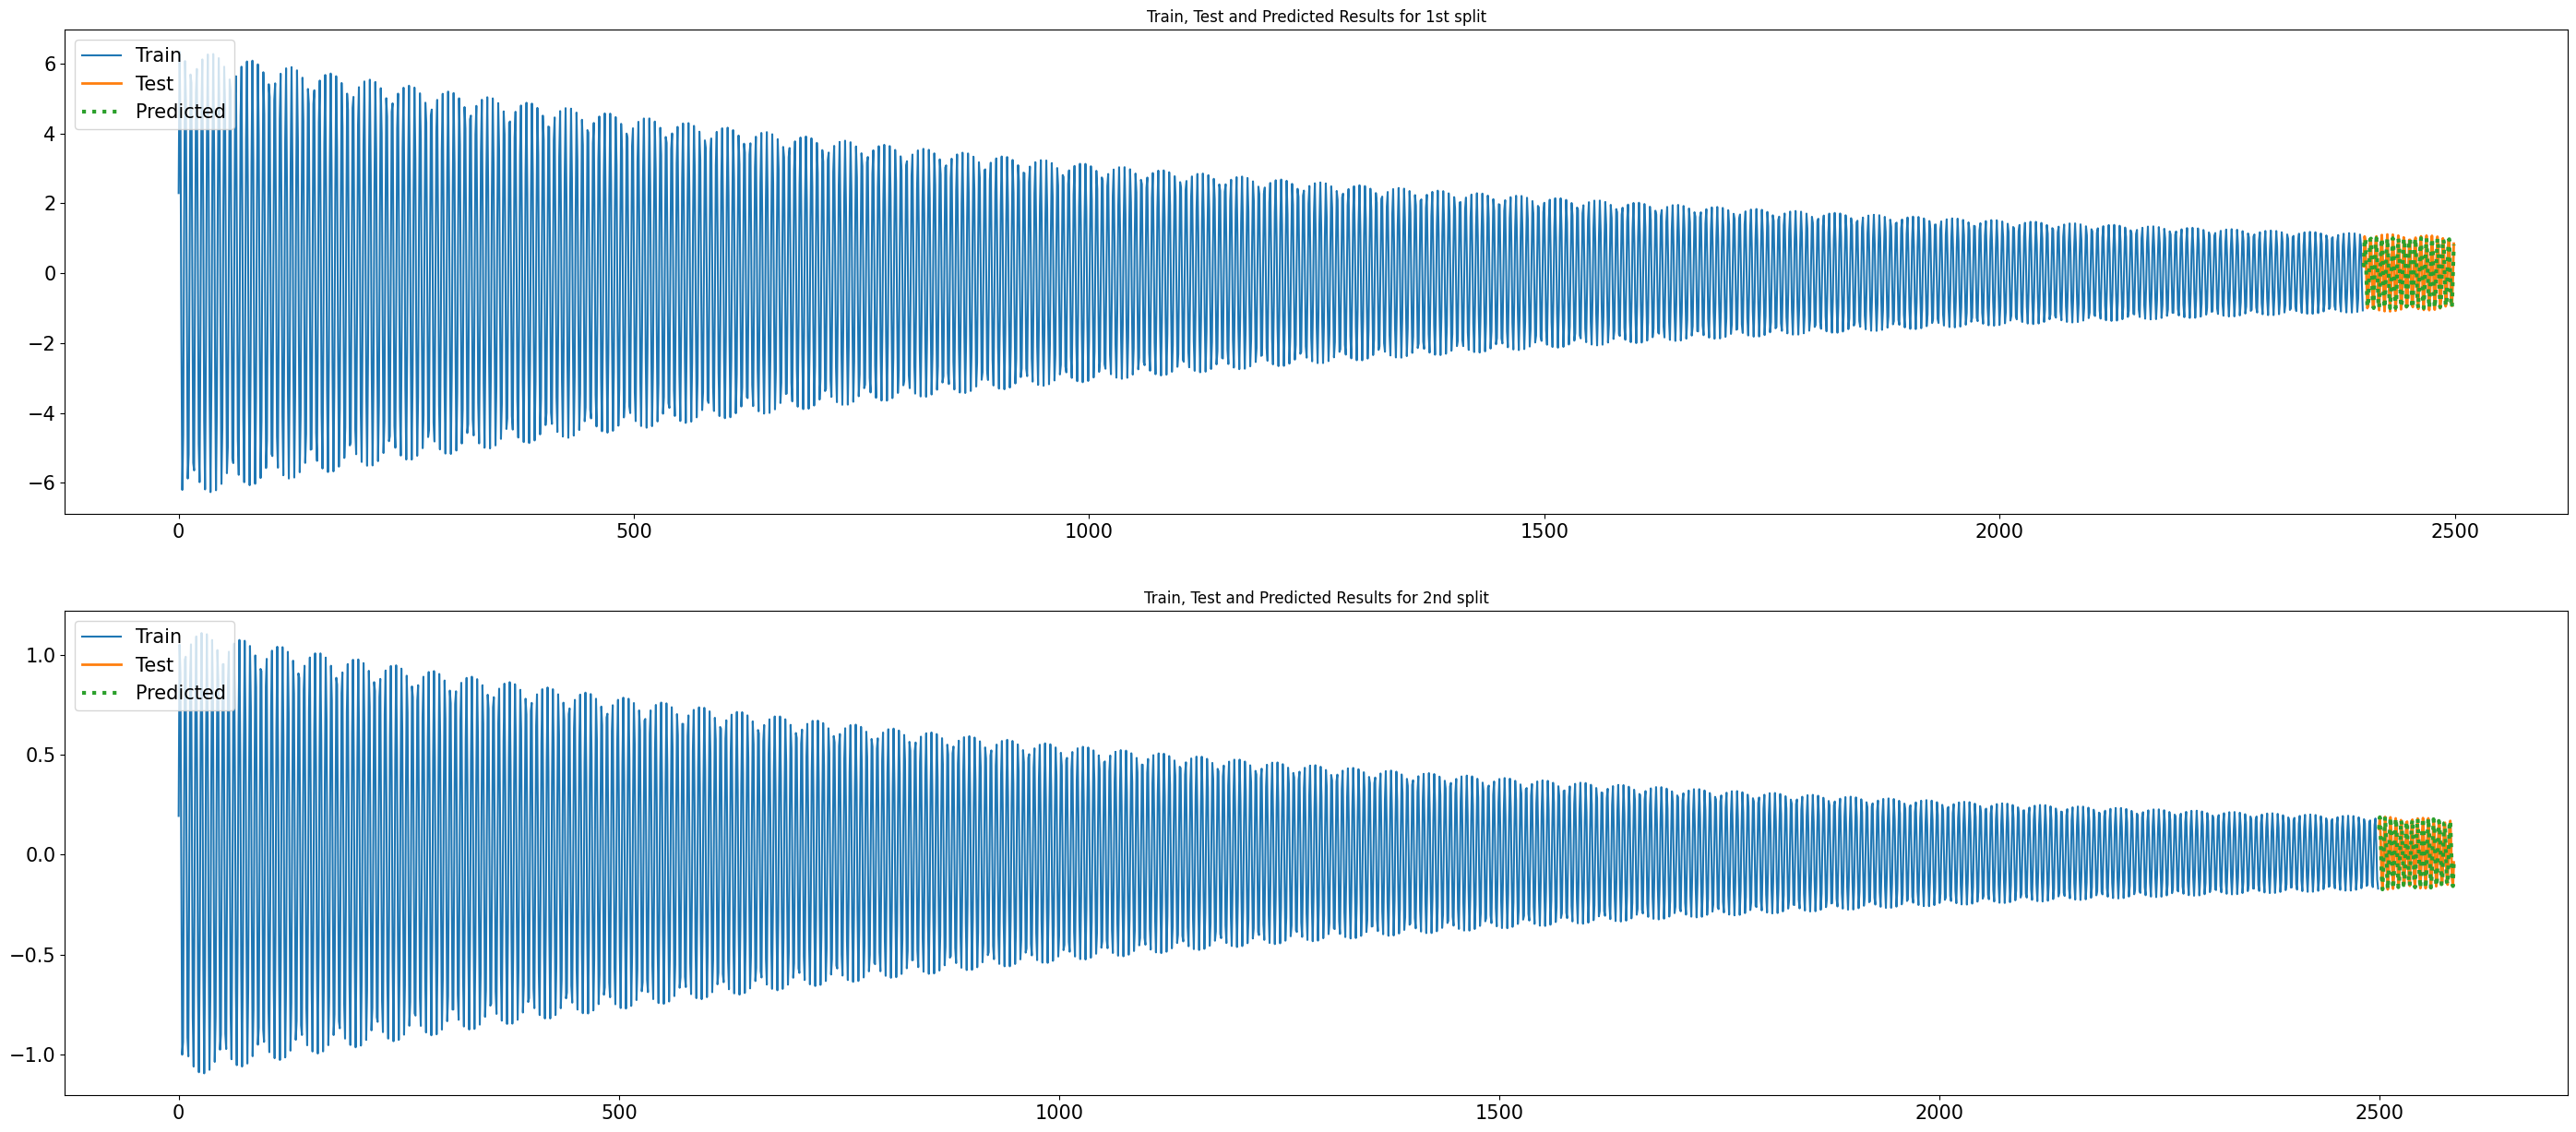

In [ ]:
lstm_func(nrEpochs, X, y)

- Once more the generated curve of mse loss for the LSTM model, now with noise introducted in the data shows little to no difference from obtained values on the first split. On the second split some peaks occur in the training process (more prominent in epochs 19 to 30).
- The predictions do not change from previous cases having observed the values in the train/test/predicted graphs of both first and second splits.

### FTLFN

4/4 [==============================] - 0s 667us/step
The mse for the 1st split is: 1.046191828570816e-13
3/3 [==============================] - 0s 1ms/step
The mse for the 2nd split is: 5.691665131644784e-14


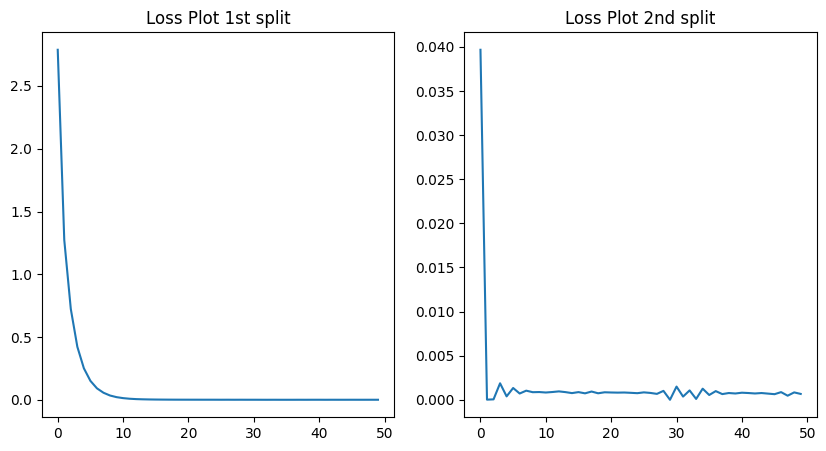

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


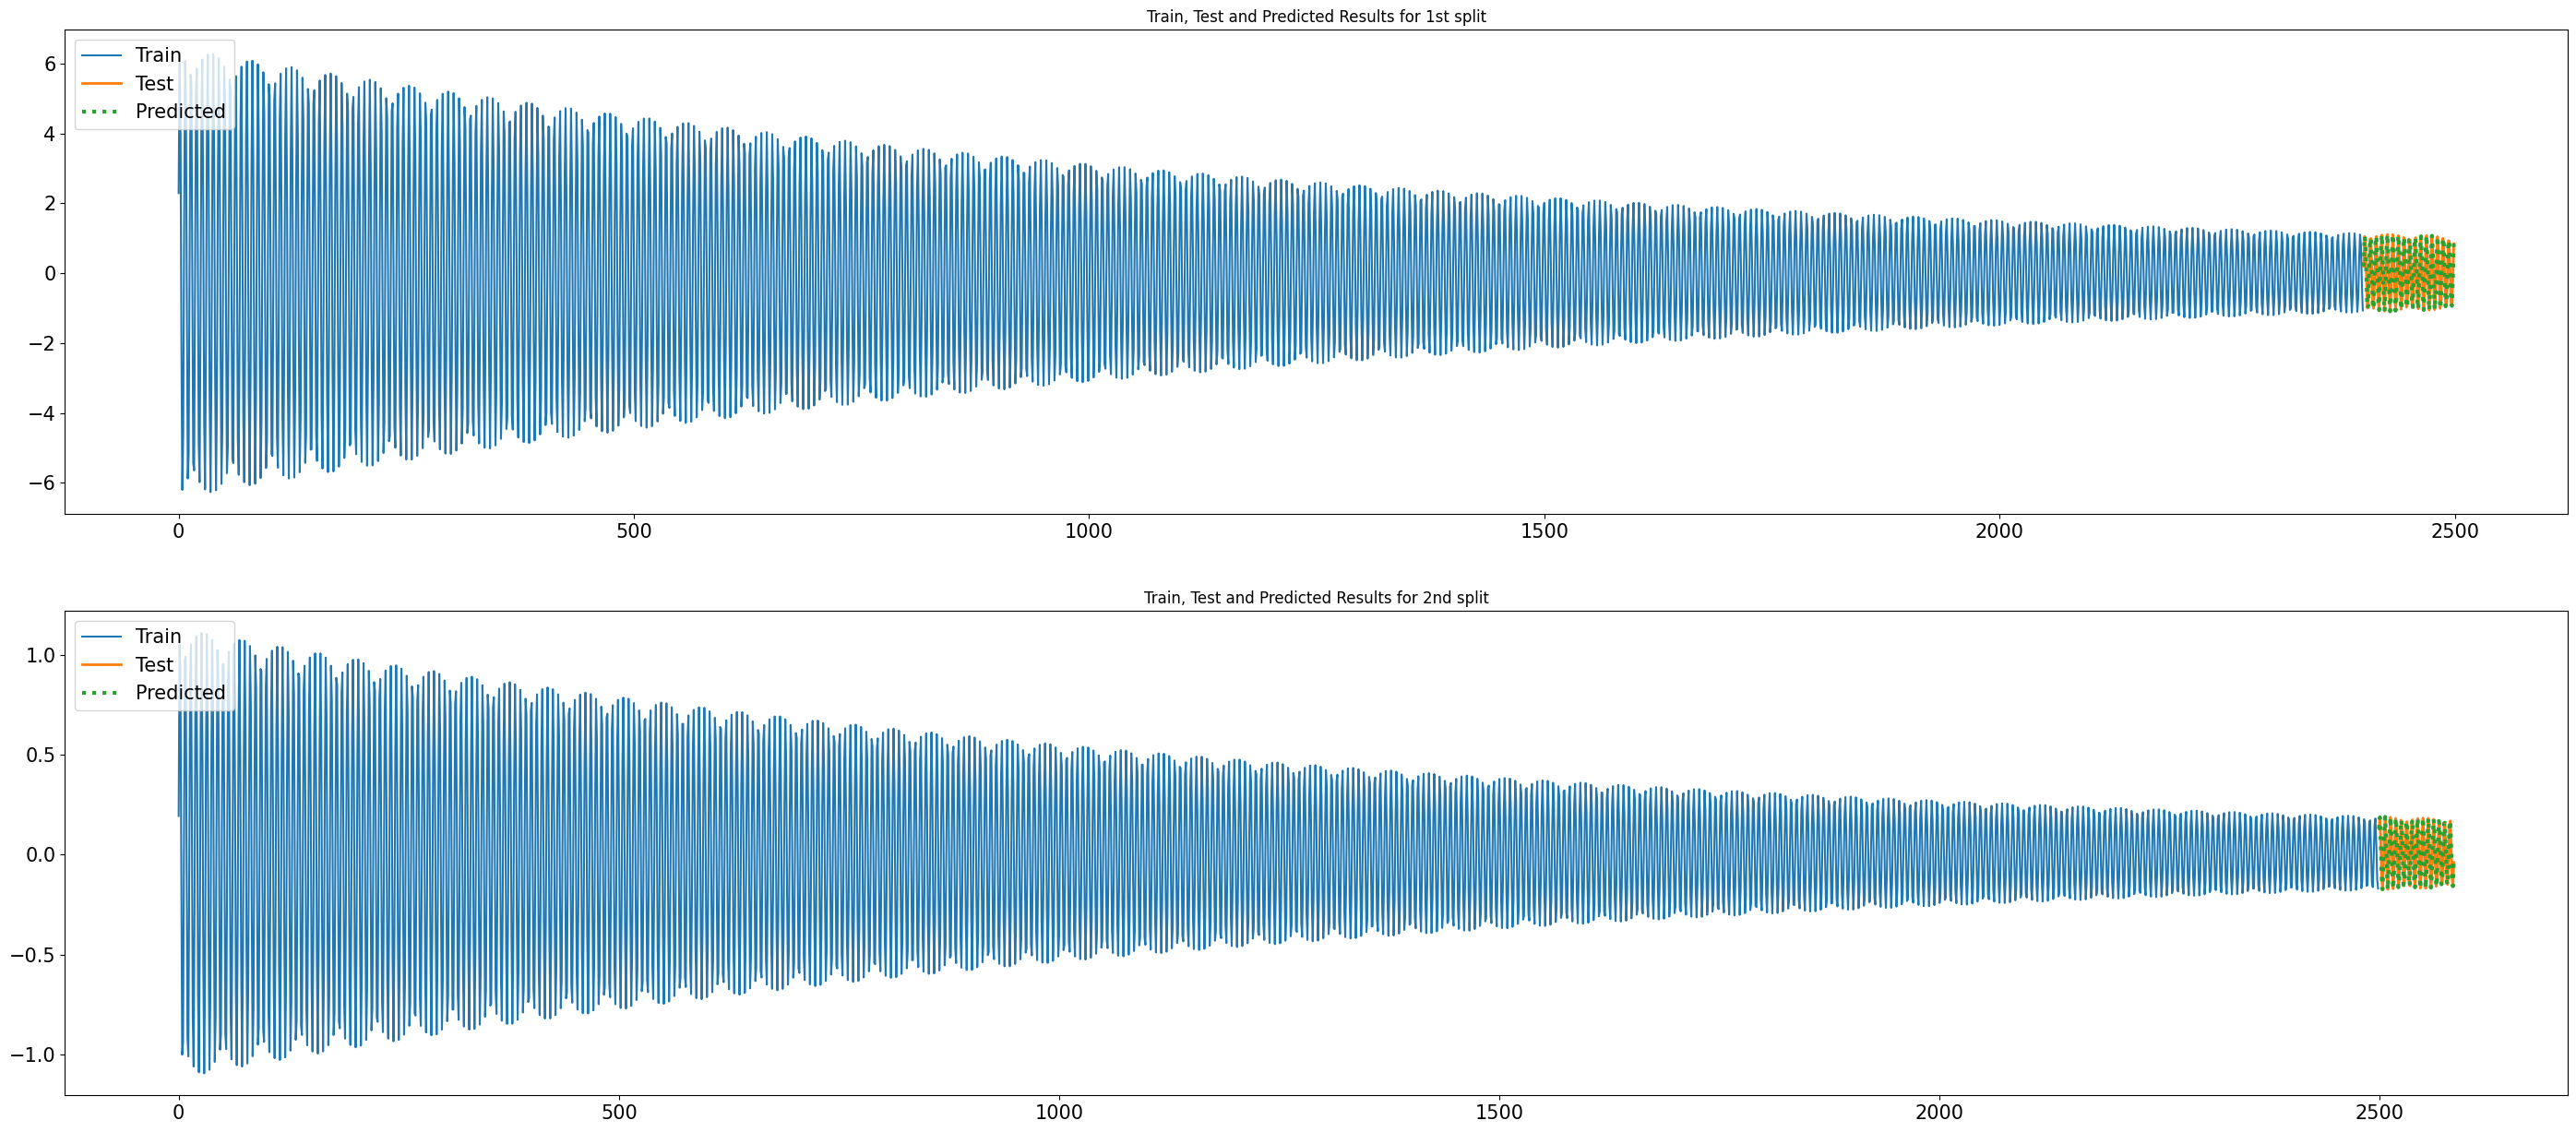

In [ ]:
ftlfn_func(nrEpochs, X, y)

- For the FTLFN model the results share some resemblance to the LSTM ones for noisy version of problem 2 data but the curves on mse loss are slightly less pronounced especially on the second split of the data.
- As it has been occurring for other models and data used in problem 2 here the visualizations of train/test/predicted values looks to not have changed at all.